**Импорты и ссылка на API**

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "https://footprint.auditory.ru/api/vec/"

**Оределим число запросов и тестируемые модели**

In [ ]:
number_of_requests = 1000

models = {'bert', 'navec', 'fasttext'}

**Тестирование метода векторизации токенов**

In [ ]:
times1 = []
words = []

with open('War and Peace.txt','r') as file:
     
    for line in file:
        for word in line.split():
            words.append(word)
            if len(words) == number_of_requests:
              break

for count, model in enumerate(models):
  times1.append([])
  for n_request in range(number_of_requests):
    response = requests.get(
        f"{BASE_URL}/vectorize_token", params={"query": words[n_request], "model_name": model}
    )
    times1[count].append(response.elapsed.total_seconds())

times1 = np.array(times1)

In [ ]:
df1 = pd.DataFrame(times1.transpose(), 
                   columns=['bert', 'navec', 'fasttext'])

**Отразим на каждом графике зависмость длительности выполнения запроса к методу API vectorize_token от его порядкового номера для каждой модели**

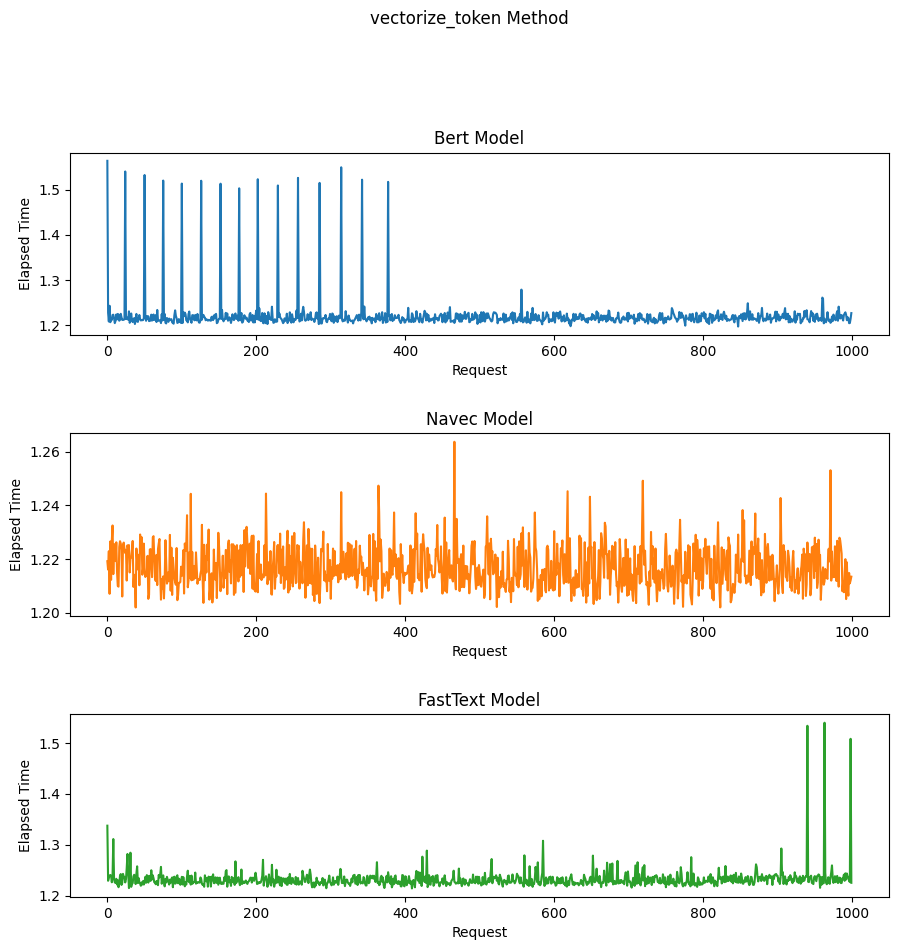

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 10))
fig.suptitle('vectorize_token Method')
fig.tight_layout(pad=5.0)

axs[0].plot(df1.bert, color='tab:blue')
axs[0].set_title('Bert Model')
axs[0].set_xlabel('Request')
axs[0].set_ylabel('Elapsed Time')

axs[1].plot(df1.navec, color='tab:orange')
axs[1].set_title('Navec Model')
axs[1].set_xlabel('Request')
axs[1].set_ylabel('Elapsed Time')

axs[2].plot(df1.fasttext, color='tab:green')
axs[2].set_title('FastText Model')
axs[2].set_xlabel('Request')
axs[2].set_ylabel('Elapsed Time')

plt.show()

**Как видим, аномалий в работе сервиса не обнаружено, за исключением небольших выбросов с превышением времени выполнения запросов**

In [ ]:
df1.describe()

,bert,navec,fasttext
count,1000.000000,1000.000000,1000.000000
mean,1.220374,1.216821,1.231964
std,0.038491,0.007879,0.019670
min,1.196899,1.201948,1.214112
25%,1.210310,1.211147,1.224289
50%,1.213914,1.214872,1.227902
75%,1.222117,1.222946,1.236222
max,1.564029,1.263689,1.539899


**Тестирование метода векторизации строк**

In [ ]:
times2 = []
strings = []

with open('War and Peace.txt','r') as file:
     
    for line in file:
      strings.append(line)
      if len(strings) == number_of_requests:
        break

for count, model in enumerate(models):
  times2.append([])
  for n_request in range(number_of_requests):
    response = requests.get(
        f"{BASE_URL}/vectorize_text", params={"query": strings[n_request], "model_name": model}
    )
    times2[count].append(response.elapsed.total_seconds())

times2 = np.array(times2)

In [ ]:
df2 = pd.DataFrame(times2.transpose(), 
                   columns=['bert', 'navec', 'fasttext'])

**Отразим на каждом графике зависмость длительности выполнения запроса к методу API vectorize_text от его порядкового номера для каждой модели**

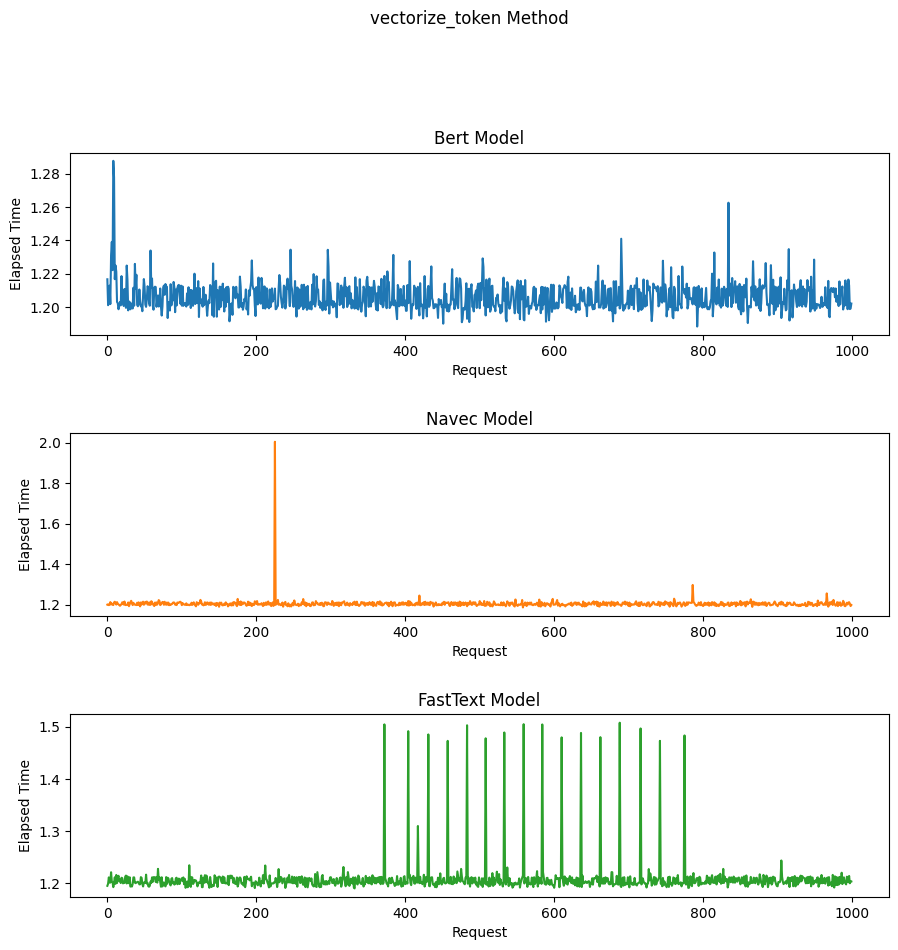

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 10))
fig.suptitle('vectorize_token Method')
fig.tight_layout(pad=5.0)

axs[0].plot(df2.bert, color='tab:blue')
axs[0].set_title('Bert Model')
axs[0].set_xlabel('Request')
axs[0].set_ylabel('Elapsed Time')

axs[1].plot(df2.navec, color='tab:orange')
axs[1].set_title('Navec Model')
axs[1].set_xlabel('Request')
axs[1].set_ylabel('Elapsed Time')

axs[2].plot(df2.fasttext, color='tab:green')
axs[2].set_title('FastText Model')
axs[2].set_xlabel('Request')
axs[2].set_ylabel('Elapsed Time')

plt.show()

**Очевидно, что время выполнения запроса стало колебаться сильнее, но все в пределах нормы**

In [ ]:
df2.describe()

,bert,navec,fasttext
count,1000.000000,1000.000000,1000.000000
mean,1.205958,1.205529,1.208849
std,0.008525,0.026567,0.036809
min,1.188206,1.187103,1.190309
25%,1.200247,1.199585,1.199195
50%,1.203230,1.202192,1.202063
75%,1.211533,1.211033,1.210705
max,1.287806,2.005078,1.507841


**Тестирование метода векторизации массивов токенов**

In [13]:
times3 = []
tokens_array = []

with open('War and Peace.txt','r') as file:
     
    for line in file:
      tokens_array.append(line.split())
      if len(tokens_array) == number_of_requests:
        break

for count, model in enumerate(models):
  times3.append([])
  for n_request in range(number_of_requests):
    response = requests.get(
        f"{BASE_URL}/vectorize_multiple_tokens", params={"query": tokens_array[n_request], "model_name": model}
    )
    times3[count].append(response.elapsed.total_seconds())

times3 = np.array(times3)

In [14]:
df3 = pd.DataFrame(times3.transpose(), 
                   columns=['bert', 'navec', 'fasttext'])

**Отразим на каждом графике зависмость длительности выполнения запроса к методу API vectorize_token_array от его порядкового номера для каждой модели**

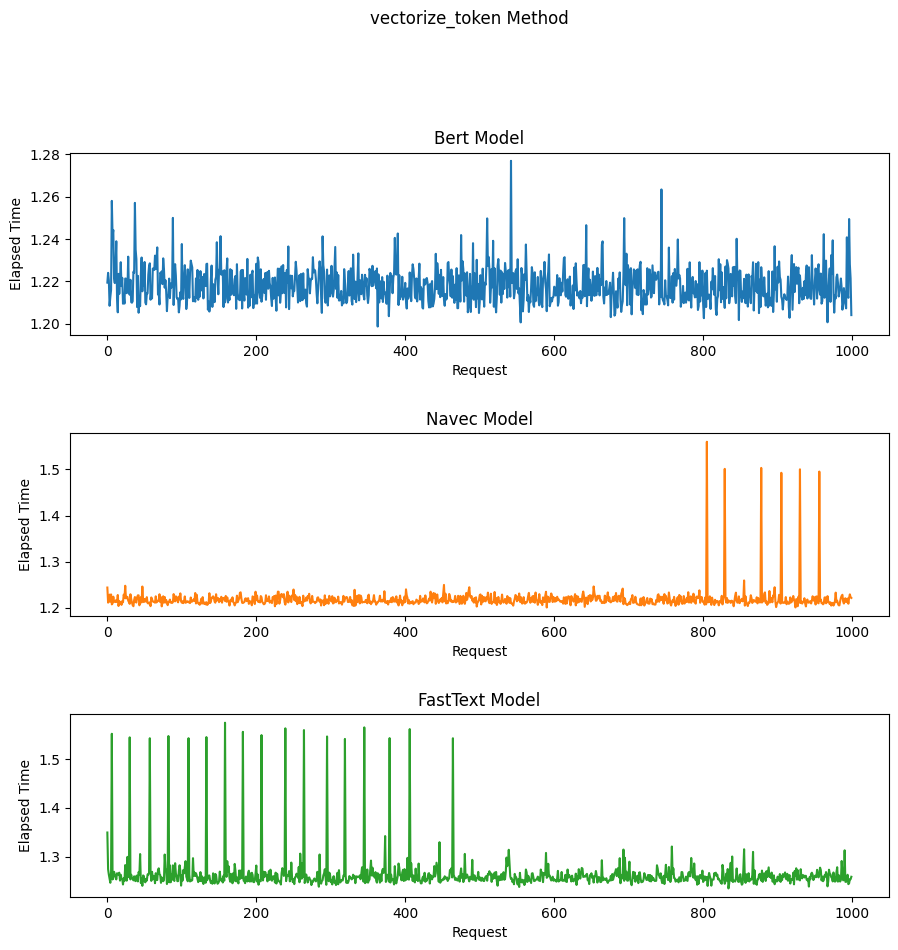

In [15]:
fig, axs = plt.subplots(3, figsize=(10, 10))
fig.suptitle('vectorize_token Method')
fig.tight_layout(pad=5.0)

axs[0].plot(df3.bert, color='tab:blue')
axs[0].set_title('Bert Model')
axs[0].set_xlabel('Request')
axs[0].set_ylabel('Elapsed Time')

axs[1].plot(df3.navec, color='tab:orange')
axs[1].set_title('Navec Model')
axs[1].set_xlabel('Request')
axs[1].set_ylabel('Elapsed Time')

axs[2].plot(df3.fasttext, color='tab:green')
axs[2].set_title('FastText Model')
axs[2].set_xlabel('Request')
axs[2].set_ylabel('Elapsed Time')

plt.show()

**Метод работает корректно за исключением редких выбросов с превышением длительности запроса в 1 секунду**

In [16]:
df3.describe()

,bert,navec,fasttext
count,1000.000000,1000.000000,1000.000000
mean,1.218156,1.218521,1.263836
std,0.008468,0.023914,0.039874
min,1.198697,1.200825,1.234682
25%,1.211991,1.211493,1.250660
50%,1.216545,1.214465,1.256563
75%,1.223764,1.222651,1.264430
max,1.276988,1.559718,1.574451
